# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?
> * **Always-on**. Can you keep collecting data over time?
> * **Non-reactive**. Is the dataset non-reactive?
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 
> * **Inaccessible**. Is the data accessible? 
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
> * **Dirty**. What aspect may make this dataset *dirty*?
> * **Sensitive**. Is there any sensitive information in the data?

**Big**: the dataset consists of 14715 Reddit posts and 651345 comments from the r/wallstreetbets subreddit. Due to the type of data and sheer volume, it would not be feasible to collect the same amount of information via surveys.

**Always on**: Yes, as long the subreddit is actively used, we can gather new data by changing the time interval in which the data was produced. 

**Non-reactive:** Yes, the users of the subreddit are not aware we gather their data, so they act like how they would usually act online. 

**Inaccessible:** The data is freely accessible on the Internet in the sense that we are only collecting data that users put out in public themselves.

**Non-representative:** The subreddit is niche. Even after gaining popularity, the people that post on the subreddit still belong 
to some untraditional types of investors who are probably not representative of the general population.

**Drifting:** The large influx of newer users might have caused population drift, as the new population of users might not be familiar with the culture of the original base. Furthermore, the large influx of new users also could result in pushing the original users away from the space, and therefore replacing the user base entirely. As a result of the new population there could also be behavioral drift, since the new users behave differently. 

**Algorithmically confounded:** Yes, people are incentiviced to get upvotes, karma and awards like reddit gold etc, since it gives them more attention and makes them feel good. This might make users self-censor and restrict what they post to what they believe is alligned with the hegemonic view of the subreddit.

**Dirty:** There are deleted comments, posts and users. Users can also spam or post other junk and it is likely that some users do.

**Sensitive:** Usernames might be used across several different platforms and could therefore be considered sensitive. However, all data collected was made publicly available by the users and is therefore not likely to be very sensitive. 

# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 4. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

# Part 2.1

**1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window**

In [36]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def setup_mpl():
#     mpl.rcParams['font.family'] = "Helvetica Neue"
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

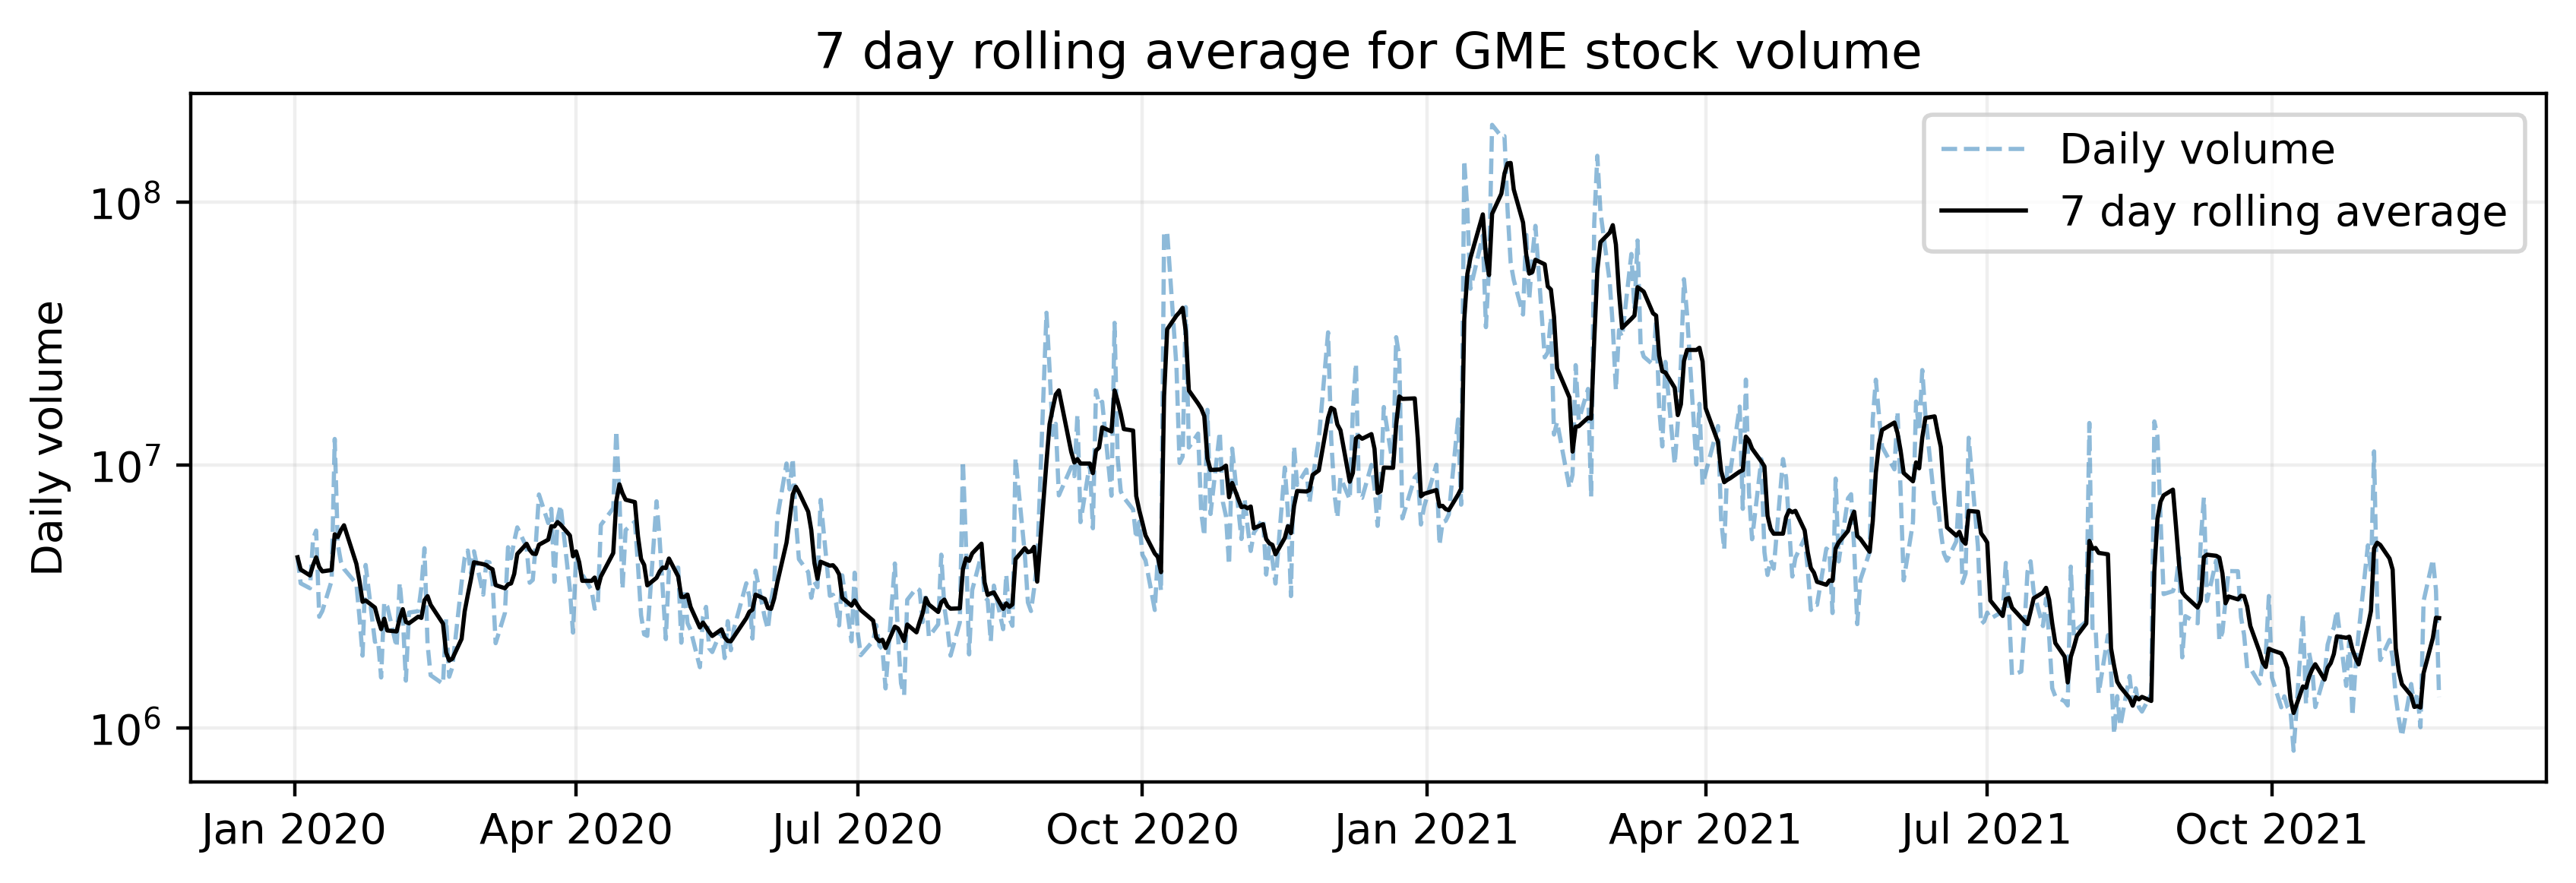

In [33]:
GME = pd.read_csv("GME.csv", parse_dates = ['Date']).set_index("Date")

# rolling 7 day average
rolled_series = GME['Volume'].rolling("7D").mean()

# plot figure
fig, ax = plt.subplots(figsize=(10,3), dpi=400)
my_fmt = mdates.DateFormatter('%b %Y')
ax.plot(GME.index, GME['Volume'], ls="--", alpha=0.5, label="Daily volume")
ax.plot(GME.index, rolled_series, color='k', label="7 day rolling average")
ax.set_ylabel("Daily volume")
ax.set_yscale("symlog") # log y axis
ax.xaxis.set_major_formatter(my_fmt)
ax.set_title("7 day rolling average for GME stock volume")
plt.grid(alpha=0.2)
ax.legend()

**2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.**

In [28]:
df = pd.read_csv("gme_comments_cleaned.csv")
df['date of creation'] = pd.to_datetime(df['date of creation'], unit='s')
df = df.set_index('date of creation')
df2 = df.resample('D').count()

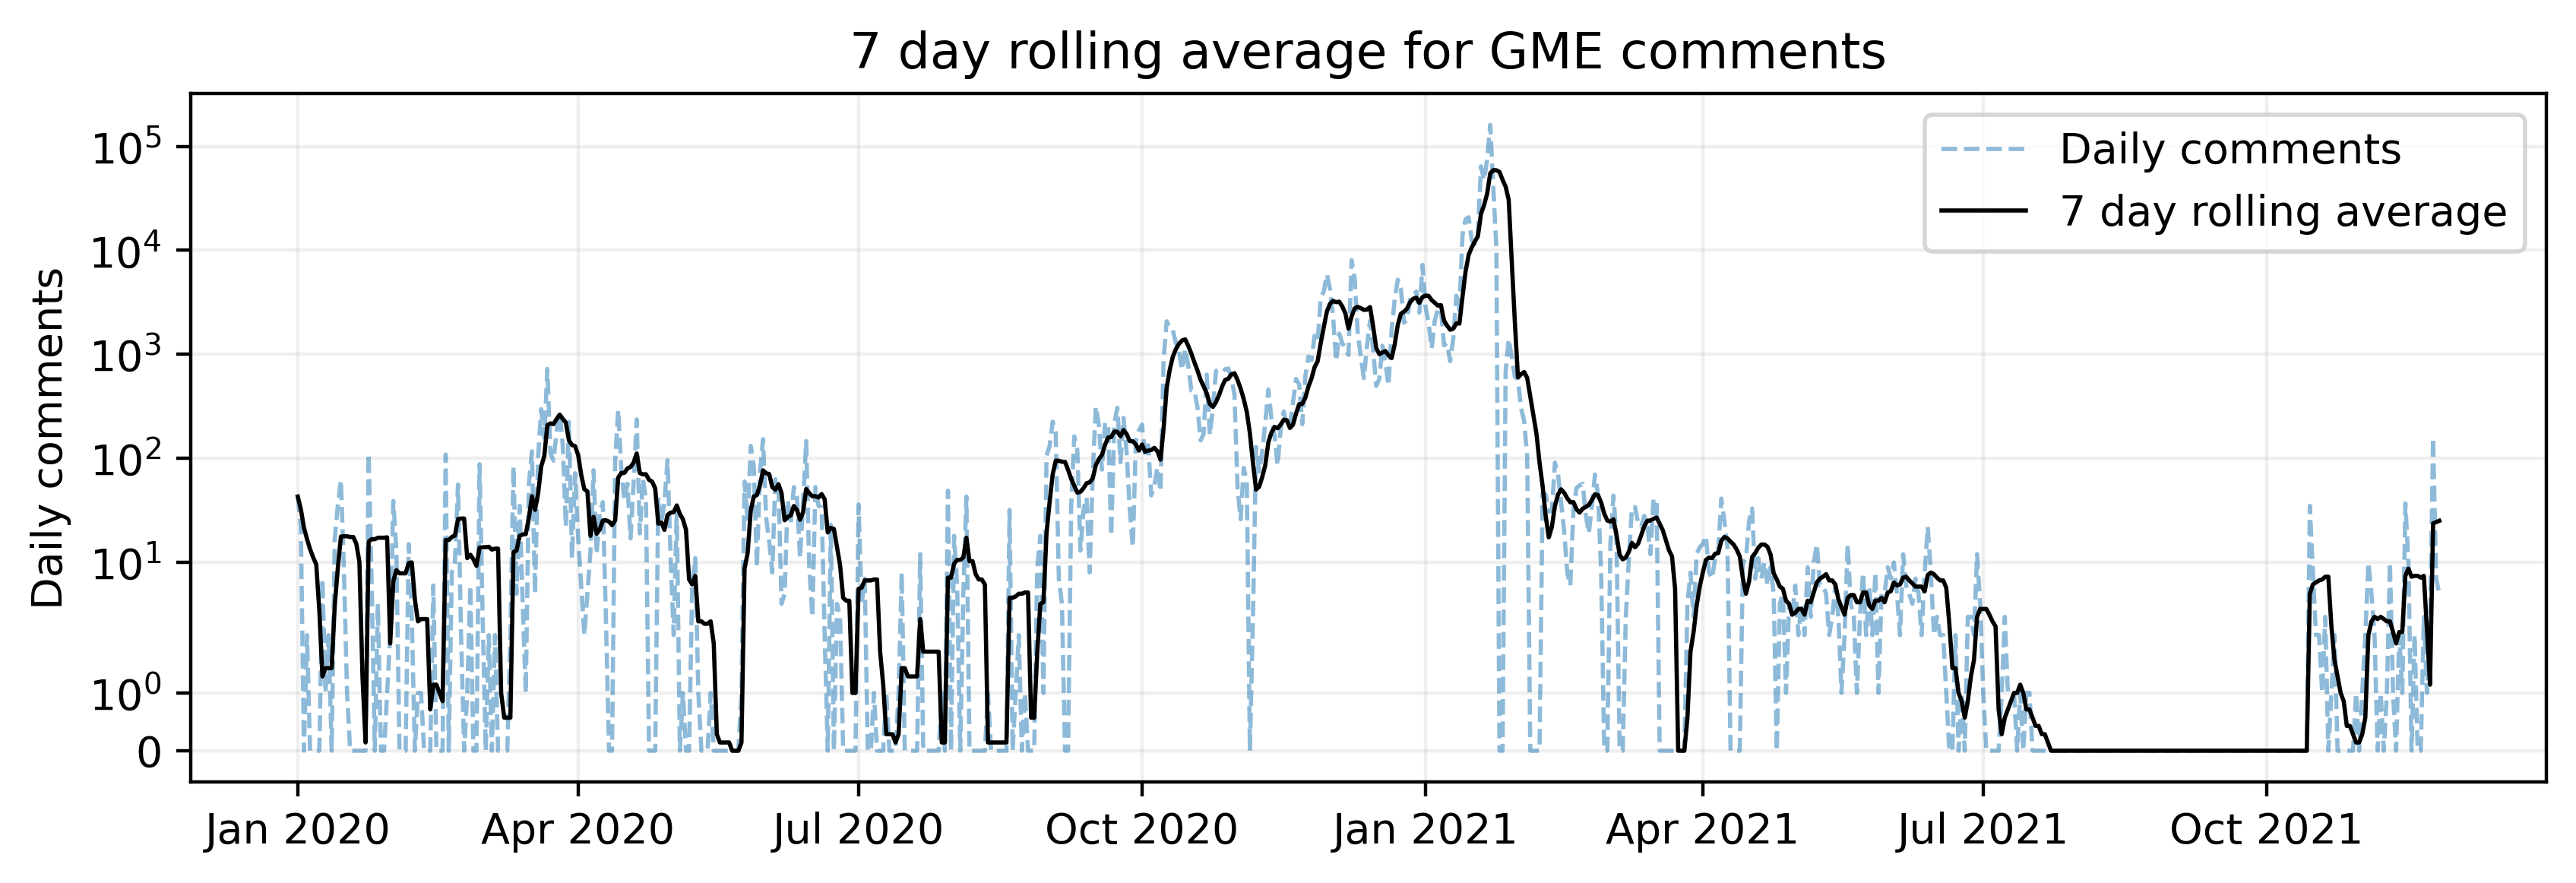

In [35]:
# rolling 7 day average
rolled_series = df2['id'].rolling("7D").mean()

# plot figure
fig, ax = plt.subplots(figsize=(10,3), dpi=400)
my_fmt = mdates.DateFormatter('%b %Y')
ax.plot(df2.index, df2['id'], ls="--", alpha=0.5, label="Daily comments")
ax.plot(df2.index, rolled_series, color='k', label="7 day rolling average")
ax.set_ylabel("Daily comments")
ax.set_yscale("symlog") # log y axis
ax.xaxis.set_major_formatter(my_fmt)
ax.set_title("7 day rolling average for GME comments")
plt.grid(alpha=0.2)
ax.legend()

**3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?**

Log scale makes it better to visualise when the values are much different in magnitude. If we did not use log scale, we might risk just seeing one high peak while the other data points look insignificantly small. However, one might easily underestimate the magnitude of differences between the highs and the lows when using log scale. 

If data is very fluctuating, the rolling average helps visualise the overall trend in the data. It might also help patch some of the potentials in the data, which seems to be the case for the plot above. 

**4. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?**

The number of comments peaks at the same time as when the stock is traded the most. From July 2021 to October 2021 there seems to be no data. This could either be a due to the dwindling interest or missing data points. The volume of GME peaks just after January 2021 and then steadily declines. This trend is also reflected in the number of comments posted on r/wallstreetbets.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*


# Part 2.2

**1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).**

**2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t.**

In [40]:
df3 = df2['id'].iloc[np.where(df2['id'] != 0)]
combined_df = pd.merge(df3, GME['Close'], left_index=True, right_index=True)

In [41]:
log_daily_returns = np.log(combined_df['Close'] / combined_df['Close'].shift(-1))
log_daily_returns = log_daily_returns.dropna() # remove nan

log_daily_comments = np.log(combined_df['id'] / combined_df['id'].shift(-1))
log_daily_comments = log_daily_comments.dropna() # remove nan

**3. Compute the correlation coefficient**

In [52]:
r = np.cov(log_daily_returns, log_daily_comments)[0][1] / (np.std(log_daily_returns,ddof=1) * np.std(log_daily_comments,ddof=1))
r

0.029078417480013958

the correlation is 0.029.

In [62]:
import scipy.stats as stats
stats.pearsonr(log_daily_returns, log_daily_comments)

(-0.19595550175990303, 0.05071236498960055)

The function stats.pearsonr outputs (correlation coefficient, p-value). The p-value is 0.61 so the correlation is not statisticaly significant on 5% significance level. 

It is worth noting that Pearson's correlation only measures linear correlation, so even though they are not linearly correlated they can still be non-linarly correlated. For example, restricting to the first 100 data points is significantly correlated:

In [63]:
stats.pearsonr(log_daily_returns[:100], log_daily_comments[:100])

(0.30137682160602836, 0.0023109538055309203)

**Make a scatter plot of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price.**

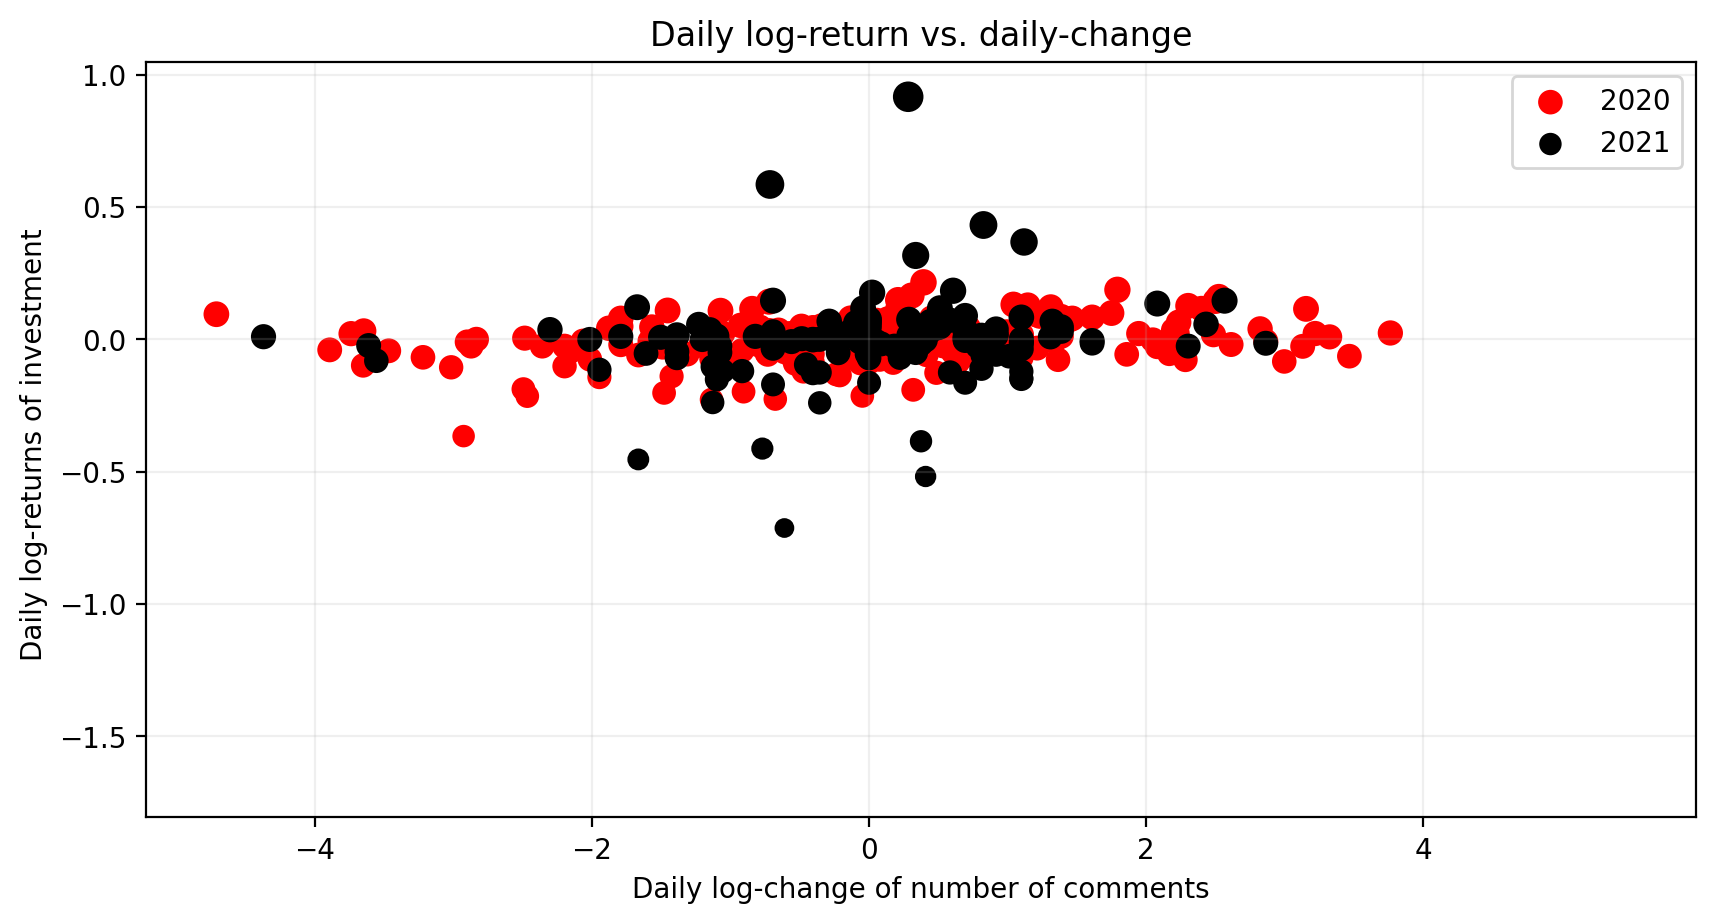

In [59]:
data = pd.concat([log_daily_returns, log_daily_comments],axis=1)

min_close = np.min(data.Close)
max_close = np.max(data.Close)

scale = 100
data_norm = (data.Close - min_close) / (max_close - min_close)
colors = {2020:'r', 2021:'k'}
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
plt.scatter(data.id[data.id.index.year == 2020], data.Close[data.id.index.year == 2020], c=data[data.id.index.year == 2020].index.year.map(colors), s=data_norm[data.id.index.year == 2020]*scale, label='2020')
plt.scatter(data.id[data.id.index.year == 2021], data.Close[data.id.index.year == 2021], c=data[data.id.index.year == 2021].index.year.map(colors), s=data_norm[data.id.index.year == 2021]*scale, label='2021')
plt.title("Daily log-return vs. daily-change")
ax.set_xlabel("Daily log-change in number of comments")
ax.set_ylabel("Daily log-returns of investment ")
plt.legend(['2020','2021'])
plt.grid(alpha = 0.2)
plt.show()

**Now take a minute to look at the figure you just prepared. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it?**

There seems to be more volatility in the daily change in log-returns of the investment for 2021, while the daily change in log-returns for 2020 seem more stable. Also the largest closing price seems to be in 2021. The daily log-change in comments varies greatly in 2020 from -4 to 4 on the x-axis. However, we should be wary since we have processed the data quite a bit. For example, the number of days where there were 0 comments were removed, as well as the weekends where the stock exchange markets are closed.  

**6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: Is the activity on wallstreetbet related to the price of the GME stock?**

Based on exercise 2 and 3, it certainly seems that the peak of the number of comments on the r/wallstreetbets subreddit coincides with the largest volume of stocks traded. During the highest closing price, there is a small positive log-change in the daily comments, indicating that the high closing price pushed the comment activity a little further.

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?